In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import Covid 19 Dataset

In [ ]:
df= pd.read_csv('worldometer_data.csv')

### **Questions for analysis**

1. What is the global recovery rate? recovered/total cases
2. How does death to recovery rate vary across different countries/countinents? Do countries with more tetst per million population have better recovery rates?
3. Are densly populated countries more vunerable to higher serious cases to less populated countries?
4. Does the number of tests per 1m correlate with lower death rates?
5. Do regions with high cases per million also experience higher serious/critical cases, and how does this relationship vary based on population density.

## **DATA PREPARATION AND CLEANING**

First step is checking the sum of null values in each column

In [ ]:
print(df.isnull().sum())

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            203
TotalDeaths          20
NewDeaths           204
TotalRecovered        4
NewRecovered        204
ActiveCases           4
Serious,Critical     85
Tot Cases/1M pop      1
Deaths/1M pop        21
TotalTests           18
Tests/1M pop         18
WHO Region           23
dtype: int64


A possible error is there's a null value in Continent and population colum despite a country/region being named.So I check the country where the continent in the df is null and that gave back 'Diamond Princess' which after research revealed it is a cruise that documented cases of Covid.

In [ ]:
missing_continent= df[df['Continent'].isnull()]['Country/Region']
print(missing_continent)

156    Diamond Princess
Name: Country/Region, dtype: object


Since this analysis will only be needed for Country and Regions, Diamond Princess cruise is dropped from the dataframe as it has no purpose.

In [ ]:
df= df[df['Country/Region']!='Diamond Princess']

Next crucial finding is that 'WHO Region' has 25 null values, to disect this problem we use the same code that we used to find the missing continent and adjust it appropriately to find the Countries with the missing 'WHO Region'.

In [ ]:
missing_Region= df[df['WHO Region'].isnull()]['Country/Region']
print(missing_Region)

84             French Guiana
102                      CAR
112                  Mayotte
158                  Réunion
159          Channel Islands
167              Isle of Man
170               Guadeloupe
171               Martinique
172           Faeroe Islands
173                    Aruba
176           Cayman Islands
177                Gibraltar
179             Sint Maarten
182         Turks and Caicos
189         French Polynesia
190             Saint Martin
191                    Macao
192                  Curaçao
197            New Caledonia
202               Montserrat
203    Caribbean Netherlands
204         Falkland Islands
Name: Country/Region, dtype: object


To solve this issue, a dictionary is created for all the Countries and Regions with missing 'WHO Regions' and manually assign the 'WHO Region' appropriately after researching.

In [ ]:
who_region_mapping = {
    'French Guiana': 'Americas',
    'CAR': 'Africa',
    'Mayotte': 'EasternMediterranean',
    'Réunion': 'EasternMediterranean',
    'Channel Islands': 'Europe',
    'Isle of Man': 'Europe',
    'Guadeloupe': 'Americas',
    'Martinique': 'Americas',
    'Faeroe Islands': 'Europe',
    'Aruba': 'Americas',
    'Cayman Islands': 'Americas',
    'Gibraltar': 'Europe',
    'Sint Maarten': 'Americas',
    'Turks and Caicos': 'Americas',
    'French Polynesia': 'WesternPacific',
    'Saint Martin': 'Americas',
    'Macao': 'WesternPacific',
    'Curaçao': 'Americas',
    'New Caledonia': 'WesternPacific',
    'Montserrat': 'Americas',
    'Caribbean Netherlands': 'Americas',
    'Falkland Islands': 'Americas'
}


With the values defined in the dictionary above, the null values are replaced with the values and the 'Who Region' is updated. The 'WHO Region' column is now checked for null values.

In [ ]:
df.loc[:, 'WHO Region'] = df['Country/Region'].map(who_region_mapping).fillna(df['WHO Region'])



Most of the remaining null values are purposefully there to represent a lack of reported cases, so the null values are set to 0 below

In [ ]:
df.loc[:,'NewCases'] = df['NewCases'].fillna(0)
df.loc[:,'TotalDeaths'] = df['TotalDeaths'].fillna(0)
df.loc[:,'NewDeaths'] = df['NewDeaths'].fillna(0)
df.loc[:,'NewRecovered'] = df['NewRecovered'].fillna(0)
df.loc[:,'Deaths/1M pop'] = df['Deaths/1M pop'].fillna(0)
df.loc[:,'Serious,Critical'] = df['Serious,Critical'].fillna(0)
df.loc[:,'ActiveCases'] = df['ActiveCases'].fillna(0)
df.loc[:,'TotalTests'] = df['TotalTests'].fillna(0)
df.loc[:,'Tests/1M pop'] = df['Tests/1M pop'].fillna(0)
df.loc[:,'TotalRecovered'] = df['TotalRecovered'].fillna(0)


Double check all the null values were handled correctly and should return back 0 for each column to represent that there are no longer any null values.

In [ ]:
print(df.isnull().sum())

Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64


Next thing to check if all the columns have the correct datatype

In [ ]:
print(df.dtypes)

Country/Region       object
Continent            object
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
WHO Region           object
dtype: object


Noticed that majority of the datatypes are in float64 when they should be in int64 as we're dealing with whole numbers. So to deal with this, put appropriate columns in a list and use a for loop to convert all values in the list to inegers using loc to specify the idex and columns.

In [ ]:
# Convert float columns to integers after rounding, handling NaN values
Convert = ['NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
           'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
           'TotalTests', 'Tests/1M pop', 'Population']

for col in Convert:
    df[col] = df[col].fillna(0).round().astype('int64')


In [ ]:
print(df.dtypes)

Country/Region      object
Continent           object
Population           int64
TotalCases           int64
NewCases             int64
TotalDeaths          int64
NewDeaths            int64
TotalRecovered       int64
NewRecovered         int64
ActiveCases          int64
Serious,Critical     int64
Tot Cases/1M pop     int64
Deaths/1M pop        int64
TotalTests           int64
Tests/1M pop         int64
WHO Region          object
dtype: object


In [ ]:
print(df.head())


  Country/Region      Continent  Population  TotalCases  NewCases  \
0            USA  North America   331198130     5032179         0   
1         Brazil  South America   212710692     2917562         0   
2          India           Asia  1381344997     2025409         0   
3         Russia         Europe   145940924      871894         0   
4   South Africa         Africa    59381566      538184         0   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0       162804          0         2576668             0      2292707   
1        98644          0         2047660             0       771258   
2        41638          0         1377384             0       606387   
3        14606          0          676357             0       180931   
4         9604          0          387316             0       141264   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0             18296             15194            492    63139605   
1              8

# Analysis

Find total cases in our dataframe

In [ ]:
df['TotalCases'].sum()

19168257

Display Total cases by Regions

In [ ]:
CasesByRegion =df.groupby('WHO Region')['TotalCases'].sum()
print(CasesByRegion)

WHO Region
Africa                    856646
Americas                10462412
EasternMediterranean     1609579
Europe                   3545475
South-EastAsia           2426899
WesternPacific            267246
Name: TotalCases, dtype: int64


Total Cases by Country


In [ ]:
CasesByRegion =df.groupby('Country/Region')['TotalCases'].sum()
print(CasesByRegion)

Country/Region
Afghanistan       36896
Albania            6016
Algeria           33626
Andorra             944
Angola             1483
                  ...  
Vietnam             747
Western Sahara       10
Yemen              1768
Zambia             7164
Zimbabwe           4339
Name: TotalCases, Length: 206, dtype: int64


In [ ]:
top_5_countries = df.nlargest(5, 'TotalCases')

print(top_5_countries[['Country/Region', 'TotalCases']])

  Country/Region  TotalCases
0            USA     5032179
1         Brazil     2917562
2          India     2025409
3         Russia      871894
4   South Africa      538184


In [ ]:
bottom_5_countries = df.nsmallest(5, 'TotalCases')

print(bottom_5_countries[['Country/Region', 'TotalCases']])

            Country/Region  TotalCases
206         Western Sahara          10
205           Vatican City          12
202             Montserrat          13
203  Caribbean Netherlands          13
204       Falkland Islands          13


Visualise total cases by region

<Axes: title={'center': 'Total Cases by Region'}, xlabel='WHO Region'>

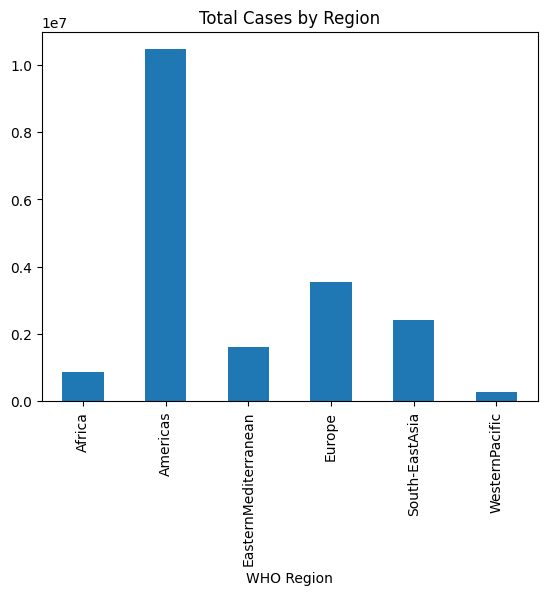

In [ ]:
df.groupby('WHO Region')['TotalCases'].sum().plot(kind='bar', title='Total Cases by Region')


Visualise Total cases by Continent

<Axes: title={'center': 'Total Cases by Continent'}, xlabel='Continent'>

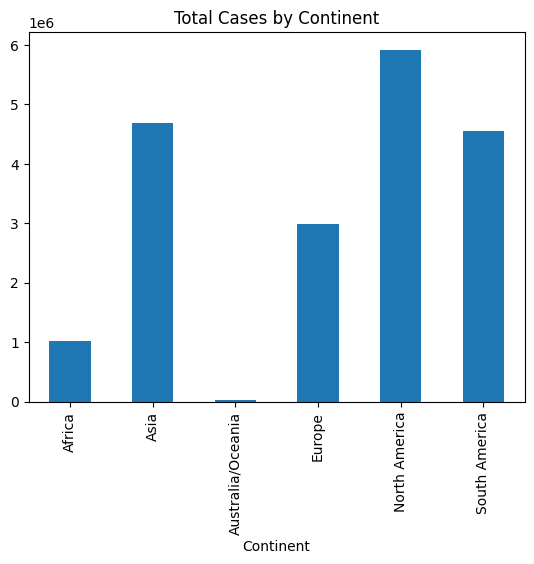

In [ ]:
df.groupby('Continent')['TotalCases'].sum().plot(kind='bar', title='Total Cases by Continent')

### **1. What is the global recovery rate? recovered/total cases**

Find out the recovery rate % by Continent

In [ ]:
continent_recovery = df.groupby('Continent')[['TotalRecovered', 'TotalCases']].sum()

# Calculate the recovery rate and round to the nearest whole number
continent_recovery['RecoveryRate (%)'] = ((continent_recovery['TotalRecovered'] / continent_recovery['TotalCases']) * 100).round().astype(int)

print(continent_recovery[['RecoveryRate (%)']])

                   RecoveryRate (%)
Continent                          
Africa                           69
Asia                             75
Australia/Oceania                58
Europe                           53
North America                    53
South America                    69


Visualise the results of the % of recovery rates by Continent

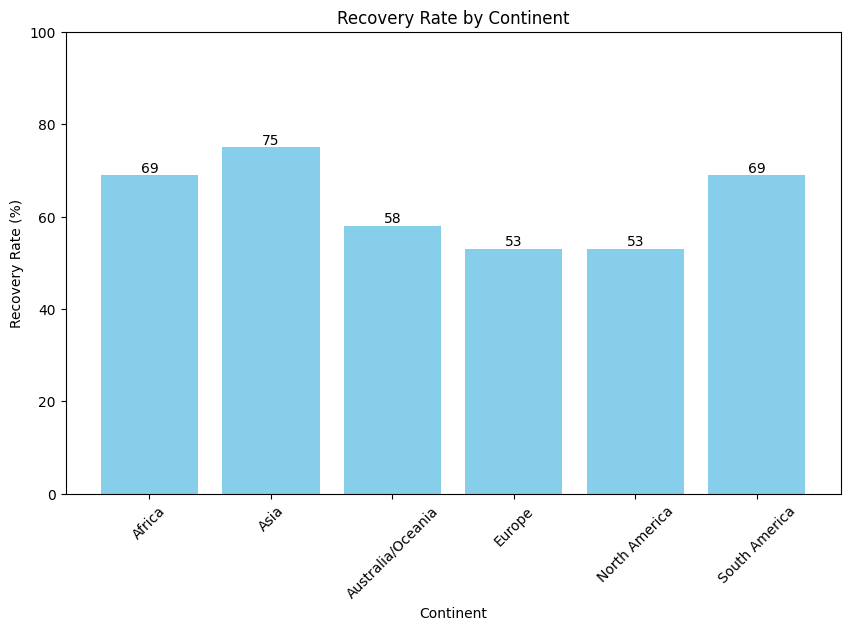

In [ ]:
plt.figure(figsize=(10, 6))
barplot=plt.bar(continent_recovery.index, continent_recovery['RecoveryRate (%)'], color='skyblue')
plt.bar_label(barplot,labels= continent_recovery['RecoveryRate (%)'],label_type="edge")
plt.xlabel('Continent')
plt.ylabel('Recovery Rate (%)')
plt.title('Recovery Rate by Continent')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

Calculate the death to recovery rate

In [ ]:
# Group by Continent and sum the relevant columns
continent_death_recovery = df.groupby('Continent')[['TotalDeaths', 'TotalRecovered']].sum()

# Calculate Death-to-Recovery Rate
continent_death_recovery['DeathToRecoveryRate (%)'] = (continent_death_recovery['TotalDeaths'] / continent_death_recovery['TotalRecovered'].replace(0, pd.NA)).fillna(0) * 100

# Round the rates to the nearest whole number
continent_death_recovery['DeathToRecoveryRate (%)'] = continent_death_recovery['DeathToRecoveryRate (%)'].round().astype(int)

print(continent_death_recovery[['DeathToRecoveryRate (%)']])


                   DeathToRecoveryRate (%)
Continent                                 
Africa                                   3
Asia                                     3
Australia/Oceania                        2
Europe                                  13
North America                            7
South America                            5


### **2. How does death to recovery rate vary across different countries/countinents? Do countries with more tests per million population have better recovery rates?**


In [ ]:
# Group by Continent and calculate average tests per million population
continentTests = df.groupby('Continent')['Tests/1M pop'].mean()

print(continentTests)


Continent
Africa                14141.087719
Asia                  71052.872340
Australia/Oceania     57847.166667
Europe               172627.916667
North America         60230.147059
South America         78117.571429
Name: Tests/1M pop, dtype: float64


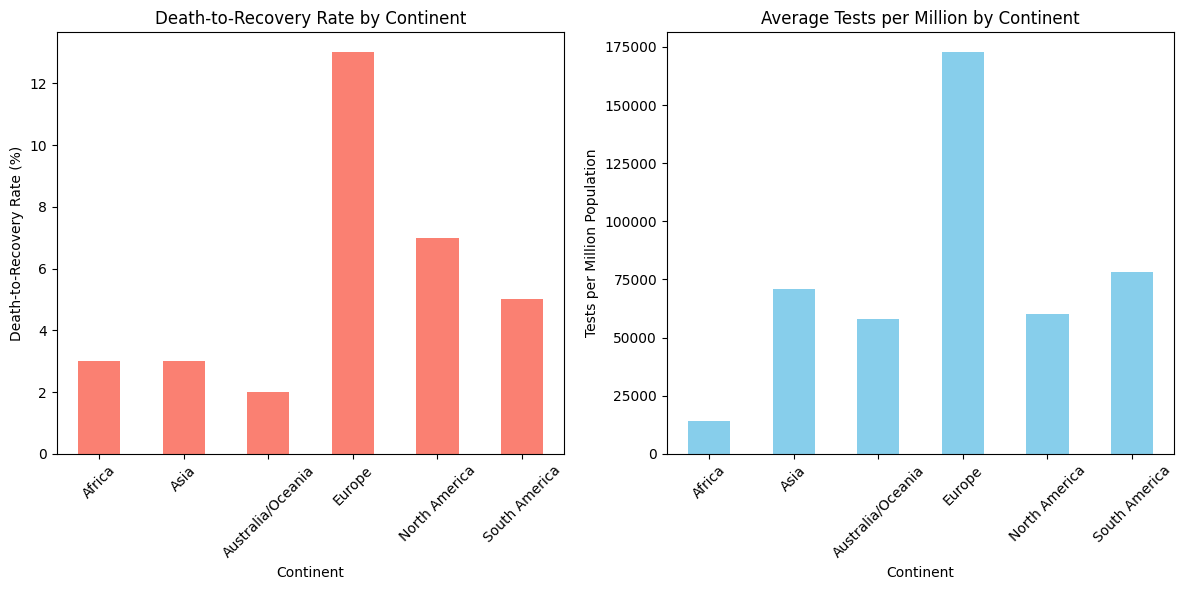

In [ ]:
# Merge death-to-recovery rates with tests per million
continent_summary = continent_death_recovery.join(continentTests)

# Plot Death-to-Recovery Rate by Continent
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
continent_death_recovery['DeathToRecoveryRate (%)'].plot(kind='bar', color='salmon')
plt.title('Death-to-Recovery Rate by Continent')
plt.xlabel('Continent')
plt.ylabel('Death-to-Recovery Rate (%)')
plt.xticks(rotation=45)

# Plot Average Tests per Million by Continent
plt.subplot(1, 2, 2)
continentTests.plot(kind='bar', color='skyblue')
plt.title('Average Tests per Million by Continent')
plt.xlabel('Continent')
plt.ylabel('Tests per Million Population')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### **3. Are densly populated countries more vunerable to higher serious cases to less populated countries?**

Group countries into a new column called 'Population category' where values are stored based on their population into a 'Very low Population', 'Low population', 'Medium Population' and 'High population' categories.

In [ ]:
# Redefine population bins with new thresholds
bins = [0, 10000000, 70000000, 350000000, float('inf')]
labels = ['Very Low Population', 'Low Population', 'Medium Population', 'High Population']

# Create a new column for the new population categories
df['Population_Category'] = pd.cut(df['Population'], bins=bins, labels=labels)

# Check the new categories
print(df[['Country/Region', 'Population', 'Population_Category']].head())



  Country/Region  Population Population_Category
0            USA   331198130   Medium Population
1         Brazil   212710692   Medium Population
2          India  1381344997     High Population
3         Russia   145940924   Medium Population
4   South Africa    59381566      Low Population


In [ ]:
# Group by population category and calculate average serious/critical cases
population_category = df.groupby('Population_Category')['Serious,Critical'].mean()

print(population_category)


Population_Category
Very Low Population      21.427350
Low Population          203.830986
Medium Population      2309.941176
High Population        8944.000000
Name: Serious,Critical, dtype: float64


<ipython-input-72-83b1ea8a2859>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  population_category = df.groupby('Population_Category')['Serious,Critical'].mean()


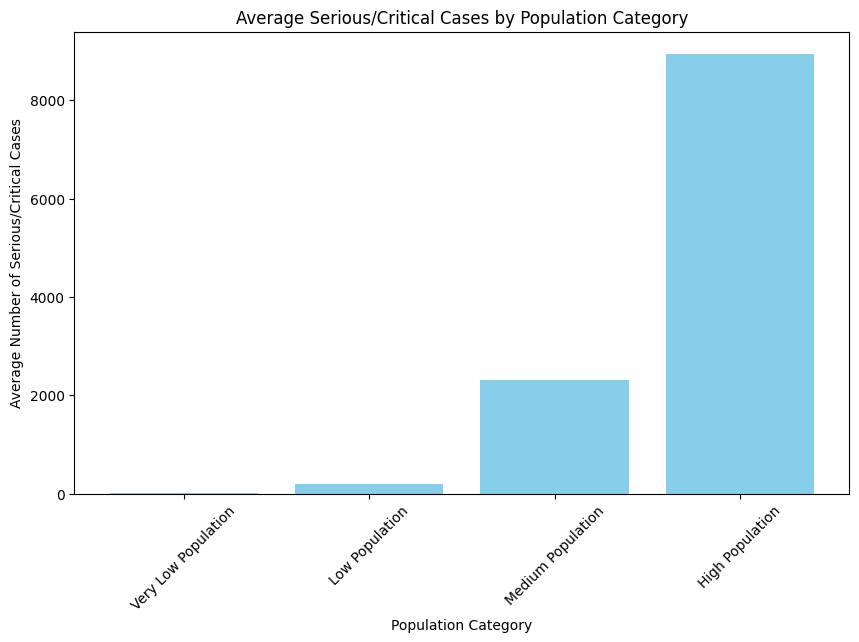

In [ ]:
plt.figure(figsize=(10, 6))
# Use population_category.index to access the population categories and population_category.values for the Serious/Critical cases
plt.bar(population_category.index, population_category.values, color='skyblue')
plt.xlabel('Population Category')
plt.ylabel('Average Number of Serious/Critical Cases')
plt.title('Average Serious/Critical Cases by Population Category')
plt.xticks(rotation=45)
plt.show()



### **4. Does the number of tests per 1m correlate with lower death rates?**

In [ ]:
# Calculate the correlation between tests per 1M and deaths per 1M
correlation = df['Tests/1M pop'].corr(df['Deaths/1M pop'])

print(f"Correlation between Tests per 1M and Deaths per 1M: {correlation:.2f}")


Correlation between Tests per 1M and Deaths per 1M: 0.13


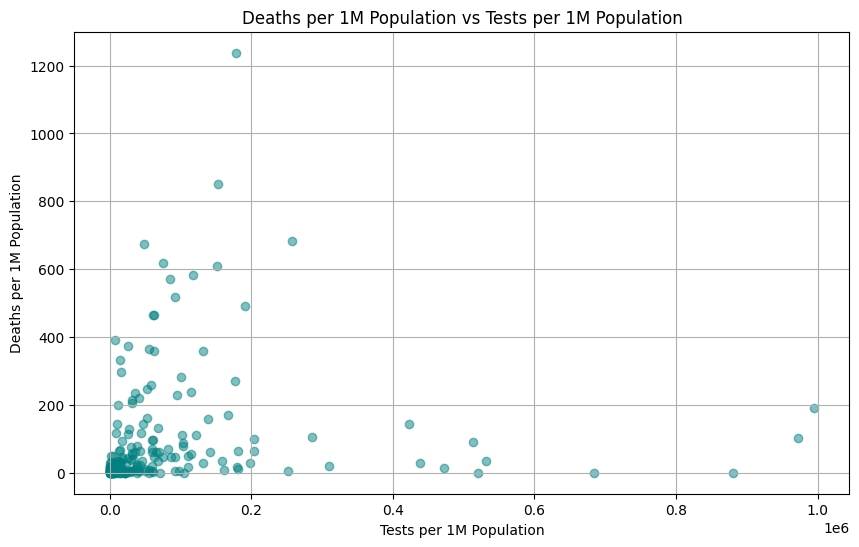

In [ ]:
# Scatter plot of Tests per 1M vs Deaths per 1M
plt.figure(figsize=(10, 6))
plt.scatter(df['Tests/1M pop'], df['Deaths/1M pop'], alpha=0.5, color='teal')
plt.title('Deaths per 1M Population vs Tests per 1M Population')
plt.xlabel('Tests per 1M Population')
plt.ylabel('Deaths per 1M Population')
plt.grid(True)
plt.show()



In [ ]:
correlation = df['Tot Cases/1M pop'].corr(df['Serious,Critical'])
print(f"Correlation between Cases per 1M and Serious/Critical Cases: {correlation:.2f}")


Correlation between Cases per 1M and Serious/Critical Cases: 0.22


### **Do regions with high cases per million also experience higher serious/critical cases, and how does this relationship vary based on population density.**

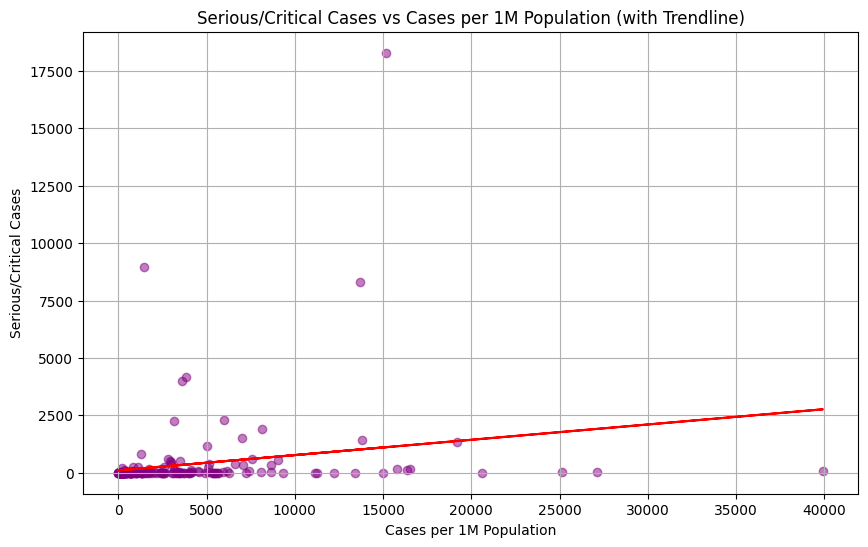

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Tot Cases/1M pop'], df['Serious,Critical'], alpha=0.5, color='purple')

# Add trendline
z = np.polyfit(df['Tot Cases/1M pop'], df['Serious,Critical'], 1)
p = np.poly1d(z)
plt.plot(df['Tot Cases/1M pop'], p(df['Tot Cases/1M pop']), color='red')

plt.title('Serious/Critical Cases vs Cases per 1M Population (with Trendline)')
plt.xlabel('Cases per 1M Population')
plt.ylabel('Serious/Critical Cases')
plt.grid(True)
plt.show()
